In [2]:
import pandas as pd
df_postcode = pd.read_excel (r'../data/raw/australian_postcodes.xlsx', sheet_name='Sheet1')
df_postcode=df_postcode[df_postcode['State']=='VIC']
df_postcode=df_postcode[["Postcode","Locality","State","SA2 MAINCODE 2016","SA2 NAME 2016"]]
df_postcode['SA2']=df_postcode['SA2 MAINCODE 2016']

df_postcode

,Postcode,Locality,State,SA2 MAINCODE 2016,SA2 NAME 2016,SA2
6151,3000,MELBOURNE,VIC,206041122.0,Melbourne,206041122.0
6152,3001,MELBOURNE,VIC,206041122.0,Melbourne,206041122.0
6153,3002,EAST MELBOURNE,VIC,206041119.0,East Melbourne,206041119.0
6154,3003,WEST MELBOURNE,VIC,206041127.0,West Melbourne,206041127.0
6155,3004,MELBOURNE,VIC,206041126.0,Southbank,206041126.0
...,...,...,...,...,...,...
18426,8111,MELBOURNE,VIC,206041122.0,Melbourne,206041122.0
18427,8120,MELBOURNE,VIC,206041122.0,Melbourne,206041122.0
18428,8205,MELBOURNE,VIC,206041122.0,Melbourne,206041122.0
18429,8785,DANDENONG,VIC,212041311.0,Dandenong,212041311.0


In [3]:
import pandas as pd
df_income = pd.read_excel (r'../data/raw/ABSIncomeSA2.xlsx', sheet_name='Table 3.4')
col_names= df_income.iloc[5]
df_income.columns=col_names
df_SA2_col=df_income.iloc[585:1047,:2]
df_income=df_income.iloc[585:1047,17:22] 
df_income=df_income.replace('np',0)
df_income[['SA2','SA2 NAME']]=df_SA2_col[['SA2','SA2 NAME']]
df_income
df_income_2=df_income
df_income_2 = df_income_2.drop(columns=['SA2', 'SA2 NAME'])
df_income_2 = df_income_2.rename(columns = {'2014-15':'2014','2015-16':'2015','2016-17':'2016',
                                  '2017-18':'2017','2018-19':'2018',}, inplace = False)


df_income_2
                               
                                        

5,2014,2015,2016,2017,2018
585,47262,49071,50119,52709,53765
586,44789,46998,48500,49798,51357
587,43925,45438,46911,49530,50639
588,40663,41769,42567,44484,46000
589,46826,48431,50684,52500,53619
...,...,...,...,...,...
1042,30262,32930,32264,32593,33698
1043,36171,38312,38326,41475,41792
1044,39205,41561,41765,44522,44721
1045,40032,41445,42687,45056,46570


In [4]:
df_income[['SA2','SA2 NAME']]=df_SA2_col[['SA2','SA2 NAME']]
df_income
df_income_2=df_income
df_income_2 = df_income_2.drop(columns=['SA2', 'SA2 NAME'])
df_income_2 = df_income_2.rename(columns = {'2014-15':'2014','2015-16':'2015','2016-17':'2016',
                                  '2017-18':'2017','2018-19':'2018',}, inplace = False)
df_income_2 = df_income_2.fillna(0)



In [5]:
df = pd.merge(df_income, df_postcode, how="left", on ="SA2")

df

,2014-15,2015-16,2016-17,2017-18,2018-19,SA2,SA2 NAME,Postcode,Locality,State,SA2 MAINCODE 2016,SA2 NAME 2016
0,47262,49071,50119,52709,53765,201011001,Alfredton,3350.0,ALFREDTON,VIC,201011001.0,Alfredton
1,47262,49071,50119,52709,53765,201011001,Alfredton,3350.0,LUCAS,VIC,201011001.0,Alfredton
2,47262,49071,50119,52709,53765,201011001,Alfredton,3352.0,CARDIGAN,VIC,201011001.0,Alfredton
3,47262,49071,50119,52709,53765,201011001,Alfredton,3352.0,CARDIGAN VILLAGE,VIC,201011001.0,Alfredton
4,44789,46998,48500,49798,51357,201011002,Ballarat,3350.0,BAKERY HILL,VIC,201011002.0,Ballarat
...,...,...,...,...,...,...,...,...,...,...,...,...
3544,40032,41445,42687,45056,46570,217041479,Warrnambool - North,3280.0,WARRNAMBOOL EAST,VIC,217041479.0,Warrnambool - North
3545,40032,41445,42687,45056,46570,217041479,Warrnambool - North,3280.0,WARRNAMBOOL WEST,VIC,217041479.0,Warrnambool - North
3546,40032,41445,42687,45056,46570,217041479,Warrnambool - North,3281.0,BUSHFIELD,VIC,217041479.0,Warrnambool - North
3547,40032,41445,42687,45056,46570,217041479,Warrnambool - North,3281.0,WOODFORD,VIC,217041479.0,Warrnambool - North


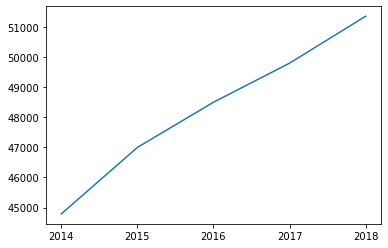

In [6]:
import matplotlib.pyplot as plt
plt.plot(df_income_2.iloc[1,:])

In [7]:
predict = ['p2019','p2020','p2021','p2022']

In [8]:
YEAR_LIST = ['2014','2015','2016', '2017','2018']
predict_df = pd.DataFrame()
i = 0
while i<2:
    predict_df[YEAR_LIST[i+2]] = round(df_income_2[YEAR_LIST[i+1]]*(1+(df_income_2[YEAR_LIST[i+1]] - df_income_2[YEAR_LIST[i]])/df_income_2[YEAR_LIST[i]]))
    i+=1
predict_df

,2016,2017
585,50949.0,51189.0
586,49316.0,50050.0
587,47003.0,48432.0
588,42905.0,43380.0
589,50091.0,53042.0
...,...,...
1042,35833.0,31611.0
1043,40580.0,38340.0
1044,44059.0,41970.0
1045,42908.0,43966.0


In [9]:
true_df = df_income_2[['2016', '2017']]

In [10]:
df_2016_2017_error = predict_df - true_df

In [11]:
true_df[true_df.isna().any(axis=1)]
predict_df[predict_df.isna().any(axis=1)]

,2016,2017
664,NaN,NaN
667,NaN,NaN
676,NaN,NaN
683,NaN,inf
711,NaN,inf
778,NaN,inf
820,NaN,inf


In [12]:
true_df[predict_df.isna().any(axis=1)]

5,2016,2017
664,0,31044
667,0,0
676,0,61614
683,41171,21013
711,35100,79676
778,94665,55593
820,81469,50404


In [13]:
predict_df_imputed = predict_df.fillna(0)

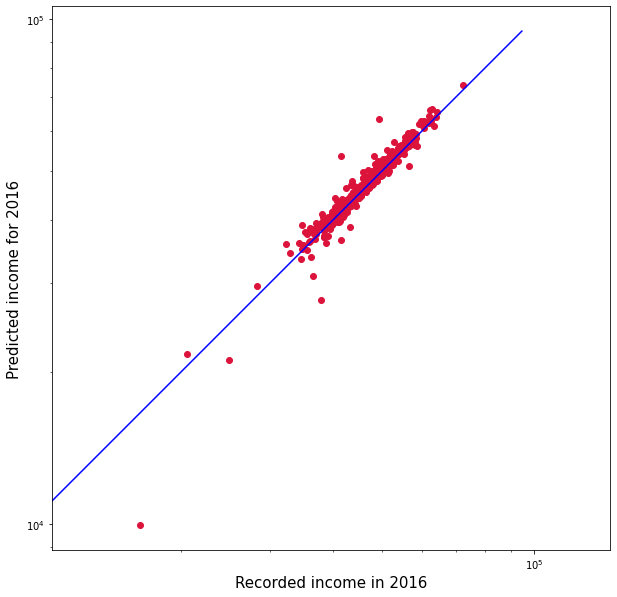

In [14]:
plt.figure(figsize=(10,10))
plt.scatter(true_df['2016'], predict_df_imputed['2016'], c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(predict_df_imputed['2016']), max(true_df['2016']))
p2 = min(min(predict_df_imputed['2016']), min(true_df['2016']))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.title('')
plt.xlabel('Recorded income in 2016', fontsize=15)
plt.ylabel('Predicted income for 2016', fontsize=15)
plt.axis('equal')
plt.show()

In [15]:
df_income_2['p2019'] = round(df_income_2['2018']*(1+(df_income_2['2018'] - df_income_2['2017'])/df_income_2['2017']))
df_income_2['p2020'] = round(df_income_2['p2019']*(1+(df_income_2['p2019'] - df_income_2['2018'])/df_income_2['2018']))
df_income_2['p2021'] = round(df_income_2['p2020']*(1+(df_income_2['p2020'] - df_income_2['p2019'])/df_income_2['p2019']))
df_income_2['p2022'] = round(df_income_2['p2021']*(1+(df_income_2['p2021'] - df_income_2['p2020'])/df_income_2['p2020']))
df_income_2['p2023'] = round(df_income_2['p2022']*(1+(df_income_2['p2022'] - df_income_2['p2021'])/df_income_2['p2021']))
df_income_2['p2024'] = round(df_income_2['p2023']*(1+(df_income_2['p2023'] - df_income_2['p2022'])/df_income_2['p2022']))
df_income_2['p2025'] = round(df_income_2['p2024']*(1+(df_income_2['p2024'] - df_income_2['p2023'])/df_income_2['p2023']))

In [16]:
df_income_2[['p2019','p2020','p2021','p2022','p2023','p2024','p2025']]

5,p2019,p2020,p2021,p2022,p2023,p2024,p2025
585,54842.0,55941.0,57062.0,58205.0,59371.0,60560.0,61773.0
586,52965.0,54623.0,56333.0,58097.0,59916.0,61792.0,63727.0
587,51773.0,52932.0,54117.0,55329.0,56568.0,57835.0,59130.0
588,47568.0,49189.0,50865.0,52598.0,54390.0,56243.0,58159.0
589,54762.0,55929.0,57121.0,58338.0,59581.0,60850.0,62146.0
...,...,...,...,...,...,...,...
1042,34840.0,36021.0,37242.0,38504.0,39809.0,41158.0,42553.0
1043,42111.0,42432.0,42755.0,43080.0,43407.0,43736.0,44067.0
1044,44921.0,45122.0,45324.0,45527.0,45731.0,45936.0,46142.0
1045,48135.0,49753.0,51425.0,53153.0,54939.0,56785.0,58693.0


https://pages.uoregon.edu/rgp/PPPM613/class8a.htm


The annual growth of a population may be shown by the equation: I = rN (K-N / K), where I = the annual increase for the population, r = the annual growth rate, N = the population size, and K = the carrying capacity.


In [27]:

df_income_2.to_csv('/Users/jia/Documents/GitHub/generic-real-estate-consulting-project-group-9/notebooks/income_prediction.csv')